# Package Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os , glob, shutil
import cv2 as cv
# cell output clear
from IPython.display import clear_output
import subprocess
from PIL import Image

---
# Utils function

In [2]:
def read_image(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

def run_model_prediction(dataset_path, batch_size, output_dir, num_workers_test, sketch_cond_rate, dataset, start_cond_rate, test_order, save_name):
    command = f"python eval.py --dataset_path {dataset_path} --batch_size {batch_size} --mixed_precision fp16 --output_dir {output_dir} --num_workers_test {num_workers_test} --sketch_cond_rate {sketch_cond_rate} --dataset {dataset} --start_cond_rate {start_cond_rate} --test_order {test_order} --save_name {save_name}"
    subprocess.run(command, shell=True)
    # clear_output()


def plot_slect_image(input_idx, ref_idx, img_dir, image_list):
    input_file_path  = os.path.join(img_dir, image_list[input_idx])
    ref_file_path    = os.path.join(img_dir, image_list[ref_idx])   
    input_img = read_image(input_file_path)
    ref_img   = read_image(ref_file_path)
    fig, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(input_img)
    ax[1].imshow(ref_img)
    ax[0].set_title("input image : " + image_list[input_idx])
    ax[1].set_title("reference image : " + image_list[ref_idx])
    ax[0].axis("off")
    ax[1].axis("off")
    #print( file name)
    plt.show()


def plot_result_image(path1,path2):

    input_img = read_image(path1)
    ref_img   = read_image(path2)
    fig, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(input_img)
    ax[1].imshow(ref_img)
    ax[0].set_title("result image : " + os.path.basename(path1))
    ax[1].set_title("result image : " + os.path.basename(path2))
    ax[0].axis("off")
    ax[1].axis("off")
    #print( file name)
    plt.show()


def save_image_pairs(input_idx, ref_idx,cloth_idx,cloth_ref_idx, image_list,cloth_list):
    
    # Write image pair to test_pairs.txt
    with open("../assets/data/vitonhd/test_pairs.txt", "w") as f:
        f.write(f"{image_list[input_idx]} {cloth_list[cloth_idx]}\n")
        f.write(f"{image_list[ref_idx]} {cloth_list[cloth_ref_idx]}")
    # Copy and rename input image to im_sketch and im_sketch_unpaired directories

    

    
    file1  = glob.glob(im_sketch_unpaired_dir +f'{image_list[input_idx][:-4]}*')[0]
    file2  = glob.glob(im_sketch_unpaired_dir +f'{image_list[ref_idx][:-4]}*')[0]

    file_name1  = f"{image_list[input_idx][:-4]}_{cloth_list[cloth_idx]}".replace(".jpg", ".png")
    file_name2  = f"{image_list[ref_idx][:-4]}_{cloth_list[cloth_ref_idx]}".replace(".jpg", ".png")
    save1 = os.path.join(im_sketch_unpaired_dir,file_name1)
    save2 = os.path.join(im_sketch_unpaired_dir,file_name2)
    

    os.rename(file1, save1)
    os.rename(file2, save2)
    



---
# Variables

In [3]:
img_dir  = '../assets/data/vitonhd/test/image'
cloth_dir  ='../assets/data/vitonhd/test/cloth/'
im_sketch_dir = '../assets/data/vitonhd/test/im_sketch/'
im_sketch_unpaired_dir = '../assets/data/vitonhd/test/im_sketch_unpaired/'

image_list = os.listdir(img_dir)
print("image length: ", len(image_list))
cloth_list = os.listdir(cloth_dir)
print("cloth length: ", len(cloth_list))


image length:  2
cloth length:  2032


---
# Select Data

In [4]:
input_idx = 0
ref_idx   = 1


cloth_idx = 542
cloth_ref_idx = 44

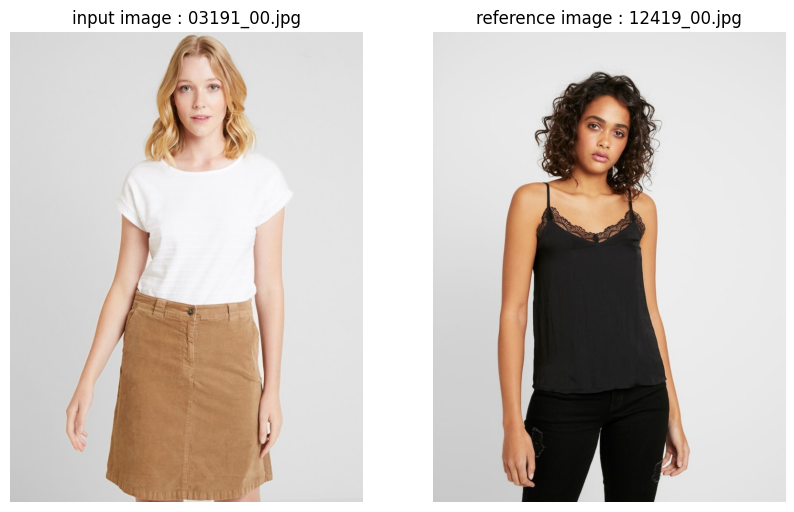

In [5]:
plot_slect_image(input_idx, ref_idx, img_dir, image_list)

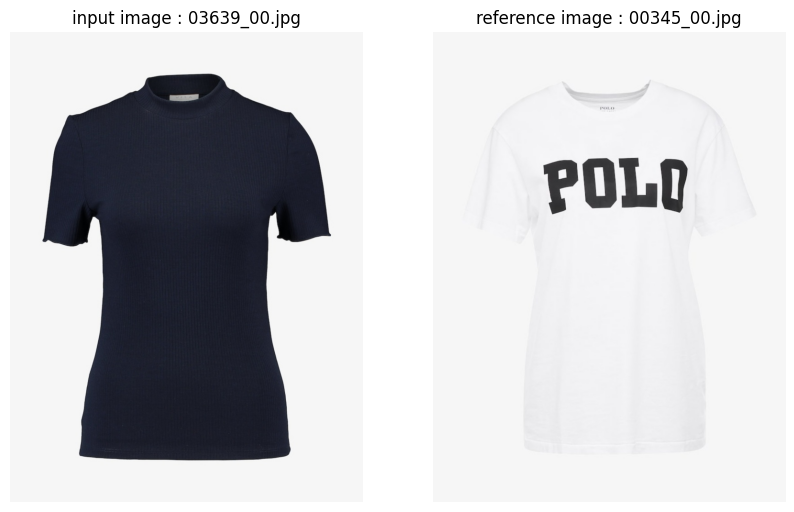

In [6]:
plot_slect_image(cloth_idx, cloth_ref_idx, cloth_dir, cloth_list)

---

# Model Prediction

In [7]:
save_image_pairs(input_idx, ref_idx,cloth_idx,cloth_ref_idx, image_list,cloth_list)

In [ ]:
!python eval.py \
--dataset_path ../assets/data/vitonhd/ \
--batch_size 1 --mixed_precision no \
--output_dir ../output/ --num_workers_test 1 \
--sketch_cond_rate 0.0 --dataset vitonhd \
--start_cond_rate 0.0 --test_order unpaired --save_name medip
clear_output()

In [ ]:
result_path1 = glob.glob(f'../output/medip_unpaired/images/{image_list[input_idx][:-4]}*.jpg')[0]

In [ ]:
result_path2 = glob.glob(f'../output/medip_unpaired/images/{image_list[ref_idx][:-4]}*.jpg')[0]

In [ ]:
plot_result_image(result_path1,result_path2)